# Final Project Submission

Please fill out:
* Student name: MARION JELIMO
* Student pace: full time
* Scheduled project review date/time: 15/09/2023 12:00PM
* Instructor name: SAMUEL KARU
* Blog post URL: N/A

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

![Image of studio](http://localhost:8890/files/Moringa%20Data%20Science/Phase%201/Project/dsc-phase-one-project/movie_studio-Copy1.jpeg)

### Objectives / Goals

- To determine the most popular genres in the current market
- To determine the relationship between genre and popularity
- To determine the impact of release dates on the performance of a movie
- To identify competition in the market
- To provide insight on the type of film to create
- To provide recommendations and next steps for the business


## Data Understanding

There were 5 sources of data provided which were:
 - [Box Office Mojo](https://www.boxofficemojo.com/) 
 - [IMDB](https://www.imdb.com/)
 - [Rotten Tomatoes](https://www.rottentomatoes.com/)
 - [TheMovieDB](https://www.themoviedb.org/)
 - [The Numbers](https://www.the-numbers.com/)
 
The project utilises data from 3 sources:
- IMDB database files; `movie_basics` and `movie_ratings`tables
- `bom.movie_gross.csv`; a CSV file
- `tmdb.movies.csv`; a CSV file


## Data Analysis - `movie_basics` and `movie_ratings` tables

The analysis starts with connecting and opening `im.db` database to access the tables `movie_basics` and `movie rating`.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)



In [1]:
# Importing the modules to allow access
# to the files in database and to allow analysis

import pandas as pd     # Library to analyse the data 
import sqlite3         # Library to allow to connect to the database
conn = sqlite3.connect('C:/Users/kimut/Moringa Data Science/Phase 1/Project./Data/im.db')    # Connecting to the database

#### `movie_basics` table

In [2]:
# Code to open the movie_basics table

df = pd.read_sql("""
SELECT * FROM movie_basics
""", conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

From the columns above, the columns of interest chosen were `runtime_minutes` and `genres`. The reason for this selection:
- To determine the popular genres in the current market
- To determine the appropriate runtime for the movie.


In [4]:
# Code to filter the table to the two columns of interest
df =pd.read_sql("""
SELECT runtime_minutes, genres
   FROM movie_basics;
""", conn)
df

,runtime_minutes,genres
0,175.0,"Action,Crime,Drama"
1,114.0,"Biography,Drama"
2,122.0,Drama
3,NaN,"Comedy,Drama"
4,80.0,"Comedy,Drama,Fantasy"
...,...,...
146139,123.0,Drama
146140,NaN,Documentary
146141,NaN,Comedy
146142,116.0,None


#### `movie_ratings` table

In [5]:
# Code to open the movie_ratings table

df2 = pd.read_sql("""
SELECT * FROM movie_ratings
""", conn)
df2

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
df2.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

From the columns above it can be noted that there is a common column, `movie_id`. The two columns, `average_rating` and `numvotes` can help assess the popularity of the movie based on its genre and runtime.

The next step in the analysis is to join the two tables using the `PRIMARY KEY`, `movie_id` to create a new table `new_joined_table` which will have the columns:
 `movie_id`, `runtime_minute`, `genres`, `averagerating`, and `numvotes`

In [7]:
# Code to combine the two tables to only have our columns of interest

query = """
CREATE TABLE new_joined_table2 AS
SELECT movie_basics.movie_id,origin runtime_minutes, genres, averagerating, numvotes
    FROM movie_basics
 JOIN movie_ratings 
 ON movie_basics.movie_id = movie_ratings.movie_id
 ORDER BY numvotes DESC;

"""

conn.commit()

# Open our new table 

df = pd.read_sql("""
SELECT * FROM new_joined_table2
""", conn)
df

,movie_id,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,165.0,"Drama,Western",8.4,1211405
4,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
73851,tt9899880,85.0,Comedy,5.8,5
73852,tt9903952,87.0,"Comedy,Horror",9.2,5
73853,tt9905796,NaN,Romance,9.0,5
73854,tt9913056,86.0,Documentary,6.2,5


In [8]:
df.columns

Index(['movie_id', 'runtime_minutes', 'genres', 'averagerating', 'numvotes'], dtype='object')

Our new table has 5 columns which we are now going to analyse. The goal of this analysis is:
- To determine the most popular genres among the movies with the highest ratings
- To determine the appropriate runtime for the movie

The next step after deciding the data to use in our analysis is ***Data Cleaning***

### Cleaning the Data
The next step in analysing the data is cleaning the data to deal with any missing values or ambiguous values and checking for outliers.

#### Checking for Missing values

In [9]:
# code to check for rows with missing values

missing_values = df.isna().sum()
print(missing_values)

movie_id              0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64


Only the columns `runtime_minutes` and `genres` have missing values.  For this analysis, we shall drop the missing values rows.

In [10]:
# Code to drop the missing values

df = df.dropna()  # A function to drop the NaN rows
df

,movie_id,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,165.0,"Drama,Western",8.4,1211405
4,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
73848,tt9879060,75.0,"Documentary,Drama",7.6,5
73850,tt9886934,81.0,Documentary,7.0,5
73851,tt9899880,85.0,Comedy,5.8,5
73852,tt9903952,87.0,"Comedy,Horror",9.2,5



From the analysis so far, from an initial of `146,144` available rows of data, only `65,720` can be used to produce meaningful insight, which is about `45%` of the initial data.

#### Checking for Outliers

Plot a scatter plot that can reveal outliers in the data.
First we import the libraries that will perform plotting our data

In [11]:
import matplotlib.pyplot as plt
import numpy as np

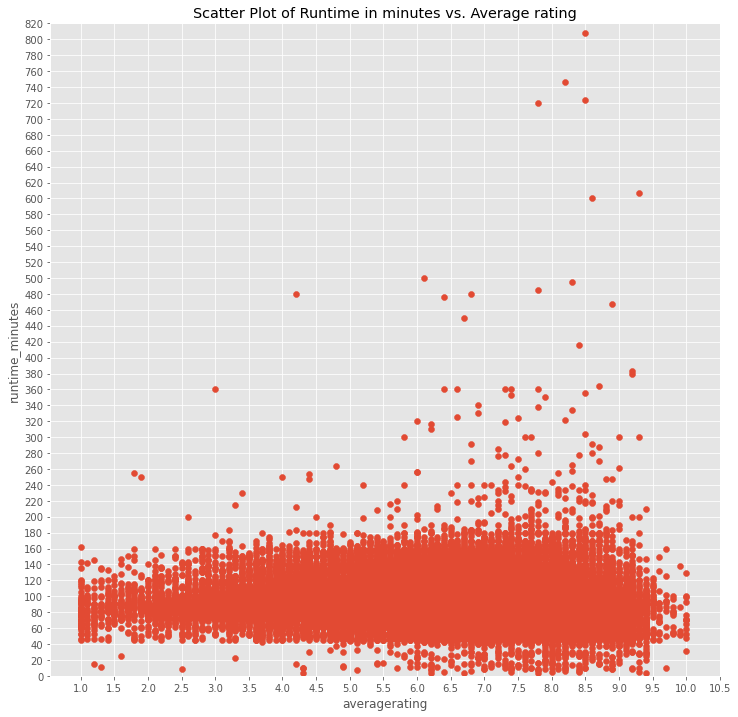

In [12]:
# Code to check for outliers
# Create scatter plots for each pair of columns

plt.figure(figsize=(12, 12))
plt.style.use('ggplot')

# Scatter plot for Column1 vs. Column2
plt.scatter(df['averagerating'], df['runtime_minutes'])
plt.xlabel('averagerating')
x_intervals = np.arange(min(df['averagerating']), max(df['averagerating']) +1, 0.5)  
plt.xticks(x_intervals)

plt.ylabel('runtime_minutes')
plt.ylim(0, 820)
plt.yticks(range(0, 821, 20))
plt.title('Scatter Plot of Runtime in minutes vs. Average rating')


plt.show()

From this:
- Majority of the films have a runtime of between `40` to `200` minutes
- Majority of the shorter films had higher rating
- Does the data suggest that a shorter film has a higher chance of having a higher rating?

- Majority of the longer films also had higher ratings
- Does the data suggest that a longer film has a higher chance of having a higher rating?
The analysis below will clarify

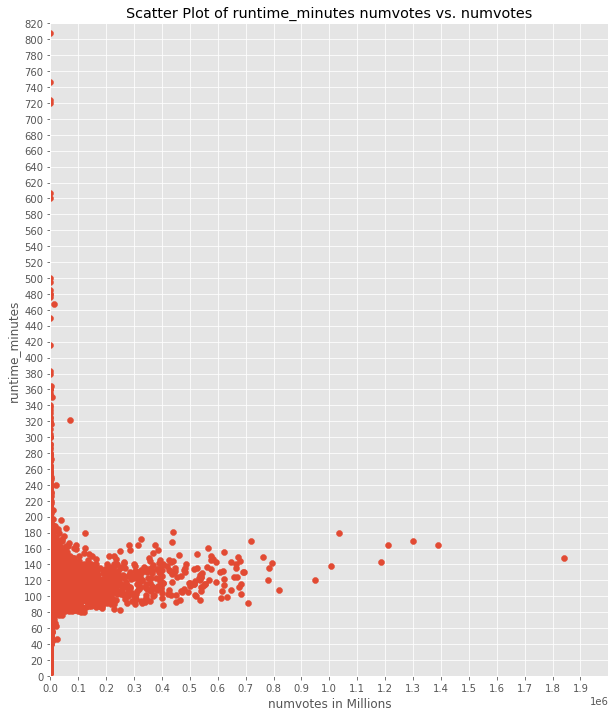

In [13]:
# Code to check for outliers
# Create scatter plots for each pair of columns

plt.figure(figsize=(10, 12))
plt.style.use('ggplot')

# Scatter plot for Column1 vs. Column2
plt.scatter(df['numvotes'], df['runtime_minutes'])
plt.xlabel('numvotes in Millions')
plt.xlim(0, 2000000)
plt.xticks(range(0, 2000000, 100000))

plt.ylabel('runtime_minutes')
plt.ylim(0, 820)
plt.yticks(range(0, 821, 20))
plt.title('Scatter Plot of runtime_minutes numvotes vs. numvotes')


plt.show()

From this we can see that :
- the short films had wat less number of voters meaning it had a smaller audience.
- The film that had the largest number of audience had a runtime of the majority of the movies

The plot below will zoom into the majority voters i.e exclude the outliers

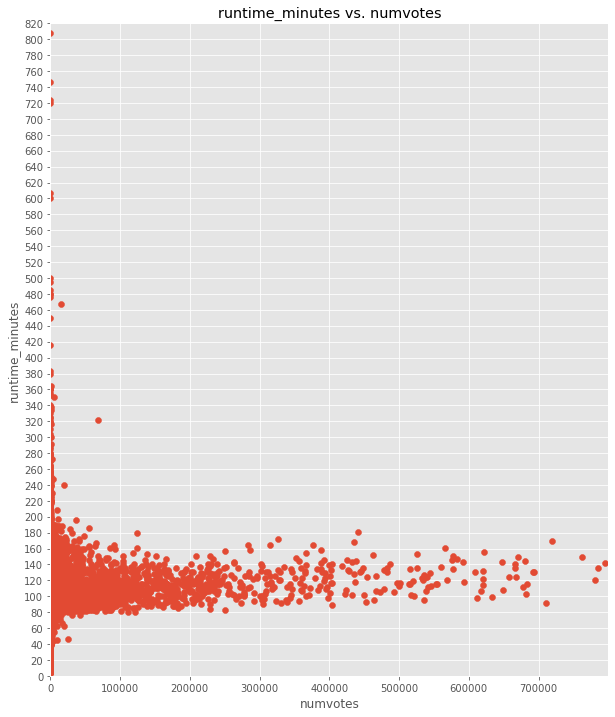

In [14]:
plt.figure(figsize=(10, 12))
plt.style.use('ggplot')

# Scatter plot for Column1 vs. Column2
plt.scatter(df['numvotes'], df['runtime_minutes'])
plt.xlabel('numvotes')
plt.xlim(0, 800000)
plt.xticks(range(0, 800000, 100000))

plt.ylabel('runtime_minutes')
plt.ylim(0, 820)
plt.yticks(range(0, 821, 20))
plt.title('runtime_minutes vs. numvotes')


plt.show()

The plot above shows us that:
- Majority of the movies are within `80` and `160` minutes
- Majority of the movies have less than `200,000` votes despite there being movies with an audience of upto `1.8 M`.

The plot below zooms in on the films with shorter runtime

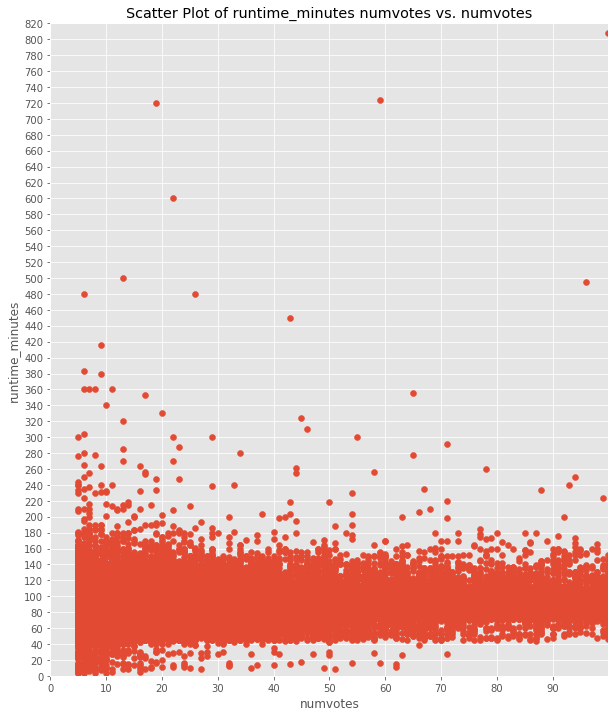

In [15]:
plt.figure(figsize=(10, 12))
plt.style.use('ggplot')

# Scatter plot for Column1 vs. Column2
plt.scatter(df['numvotes'], df['runtime_minutes'])
plt.xlabel('numvotes')
plt.xlim(0, 100)
plt.xticks(range(0, 100, 10))

plt.ylabel('runtime_minutes')
plt.ylim(0, 820)
plt.yticks(range(0, 821, 20))
plt.title('Scatter Plot of runtime_minutes numvotes vs. numvotes')


plt.show()

The plot above clarifies for us that despite the shows with less `runtime_minutes` of `40` minutes and below, majority of them with a higher rating of `6.0` to `9.5`, they typically have a really small audience of less than `100` votes.

Our objective has just gotten clearer which is :
- To make a film that will attract a **large audience**  and recieve a **high rating** feedback. 
- To give correct insight to Microsoft on the **runtime** the movie should have to reach a **larger audience** and have a **higher rating**.

The runtime clearly has an effect on the size of the audience therefore we shall have to deal with data that has higher number of votes and higher ratings.

Before that, we have to check the relation between numvotes and rating

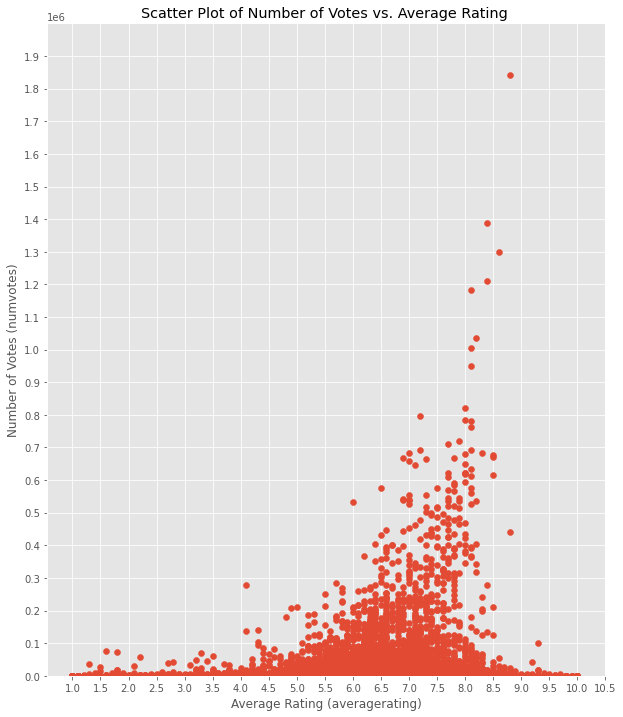

In [16]:

plt.figure(figsize=(10, 12))
plt.style.use('ggplot')


# Scatter plot for averagerating vs. numvotes
plt.scatter(df['averagerating'], df['numvotes'])  

x_intervals = np.arange(min(df['averagerating']), max(df['averagerating']) +1, 0.5)  
plt.xticks(x_intervals)
plt.xlabel('Average Rating (averagerating)')


plt.ylabel('Number of Votes (numvotes)')
plt.ylim(0, 2000000)
plt.yticks(range(0, 2000000, 100000))

plt.title('Scatter Plot of Number of Votes vs. Average Rating ')




plt.grid(True)
plt.show()

In the above plot, we can see that majority of the  movies with higher ratings have a smaller audience. So we shall focus on the films with higher rating and a larger audience, and runtime ofbetween `80` to `200` minutes.

    **Note**: It can be determined as at now, the suggested runtime of the movie should be between `80` and `160` minutes, which is anywhere between 1 hr 20 min to 2 hours 40 min.
The data will exclude extreme outliers in each case.



In [17]:
# Code to filter our data further
#Filtering the dataframe to films with a runtime of between 80 to 200 minutes

df = df[(df['runtime_minutes'] >= 80) & (df['runtime_minutes'] <=200)]
df

,movie_id,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,165.0,"Drama,Western",8.4,1211405
4,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
73837,tt9766528,97.0,Drama,3.2,5
73850,tt9886934,81.0,Documentary,7.0,5
73851,tt9899880,85.0,Comedy,5.8,5
73852,tt9903952,87.0,"Comedy,Horror",9.2,5


In [18]:
#Filtering the dataframe further to films with an average rating of between 7.0 and above
df = df[df['averagerating'] >= 7.0]
df

,movie_id,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,165.0,"Drama,Western",8.4,1211405
4,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
73830,tt9653828,126.0,Drama,8.6,5
73834,tt9695462,93.0,Horror,8.4,5
73836,tt9760516,94.0,"Biography,Documentary",7.4,5
73850,tt9886934,81.0,Documentary,7.0,5


In [19]:
#Filtering the dataframe even further to films with the larger audiences that participated in voting. That is between 100,000 to 800,000

df = df[(df['numvotes'] >= 100000) & (df['numvotes'] <=800000)]
df

,movie_id,runtime_minutes,genres,averagerating,numvotes
9,tt1392170,142.0,"Action,Adventure,Sci-Fi",7.2,795227
10,tt2488496,136.0,"Action,Adventure,Fantasy",8.0,784780
11,tt1392190,120.0,"Action,Adventure,Sci-Fi",8.1,780910
12,tt2267998,149.0,"Drama,Mystery,Thriller",8.1,761592
13,tt0903624,169.0,"Adventure,Family,Fantasy",7.9,719629
...,...,...,...,...,...
603,tt6857112,116.0,"Horror,Mystery,Thriller",7.1,102511
604,tt1327773,132.0,"Biography,Drama",7.2,102468
608,tt1023114,133.0,"Adventure,Drama,History",7.3,102126
612,tt2402927,118.0,"Drama,Romance",7.2,100680


We have narrowed down our interest to only those films that are doing well in the market because those are the films we want to learn from.

The next item on our objectives list is to determine the genre(s) the film will fall under.

To do this, we shall check the most recurrent genres of the selected films and see which one(s) have a higher popularity based on audience i.e. the `numvotes` column and `averagerating` column

In [20]:
# Code to check the genres with the highest frequencies in the data
# The code uses the methods to convert from a series to a list of tuples
genre_value_counts = df['genres'].value_counts().reset_index().values.tolist()

genre_value_counts[:5]

[['Action,Adventure,Sci-Fi', 24],
 ['Adventure,Animation,Comedy', 14],
 ['Drama', 13],
 ['Comedy,Drama,Romance', 12],
 ['Action,Adventure,Animation', 12]]

In the above output it can be seen that the movie genres are grouped, i.e. not just based on a single genre.

We can plot to see how popular the genres are in relation to
1. size of the audience(`numvotes`)
2. average rating(`averagerating`)

Since we already have the frequencies of the genres, we can get the mean number of votes and mean average rating for each genre frequency then plot their relationships

In [21]:
# Code to get the mean votes of each genre 
# to see the average number of the audience per group genre

mean_votes_by_genre = df.groupby('genres')['numvotes'].mean()
mean_votes_by_genre

genres
Action,Adventure,Animation    246157.083333
Action,Adventure,Biography    401163.000000
Action,Adventure,Comedy       359976.222222
Action,Adventure,Crime        394189.000000
Action,Adventure,Drama        296071.000000
                                  ...      
Horror                        338445.000000
Horror,Mystery,Thriller       300072.666667
Horror,Thriller               358833.000000
Mystery,Sci-Fi,Thriller       406532.500000
Romance,Sci-Fi,Thriller       227616.000000
Name: numvotes, Length: 102, dtype: float64

In [22]:
# Code to arrange with regard to the group of genres with the highet frequency
result_df = pd.DataFrame({'Genres_by_group': genre_value_counts, 'Mean Votes': mean_votes_by_genre, 'Frequency': df['genres'].value_counts(), })
result_df = result_df.sort_values(by='Frequency', ascending=False)
result_df.head(5)

,Genres_by_group,Mean Votes,Frequency
"Action,Adventure,Sci-Fi","[Action,Crime,Thriller, 8]",539816.041667,24
"Adventure,Animation,Comedy","[Biography,Crime,Drama, 3]",345967.500000,14
Drama,"[Drama,Family, 1]",215346.153846,13
"Action,Adventure,Animation","[Action,Adventure,Sci-Fi, 24]",246157.083333,12
"Comedy,Drama,Romance","[Action,Biography,Comedy, 1]",233076.833333,12


In [23]:
# Code to arrange with regard to the group of genres with the highet number of mean votes

result_df = pd.DataFrame({'Genres_by_group': genre_value_counts, 'Mean Votes': mean_votes_by_genre, 'Frequency': df['genres'].value_counts(), })
result_df = result_df.sort_values(by='Mean Votes', ascending=False)
result_df.head(5)

,Genres_by_group,Mean Votes,Frequency
"Adventure,Drama,Sci-Fi","[Comedy,Drama,Fantasy, 2]",680116.0,1
"Adventure,Comedy,Crime","[Animation,Comedy,Family, 3]",633604.0,1
"Action,Adventure,Horror","[Action,Adventure,Comedy, 9]",553751.0,1
"Crime,Mystery,Thriller","[Action,Drama,Mystery, 1]",553156.0,1
"Action,Sci-Fi","[Horror,Mystery,Thriller, 3]",546284.0,1


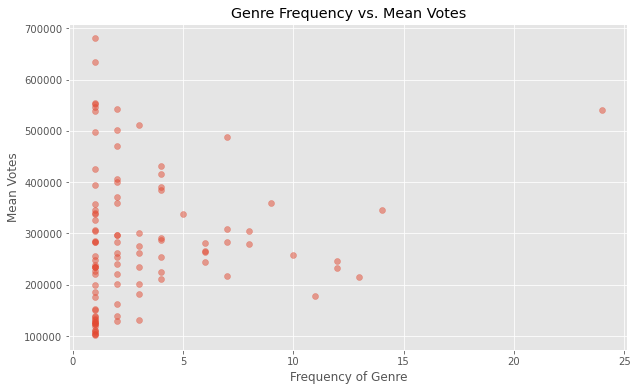

In [24]:
# Creating a bar plot representing the relationship between genres and audience size

plt.figure(figsize=(10, 6))
plt.scatter(result_df['Frequency'], result_df['Mean Votes'], alpha=0.5)
plt.xlabel('Frequency of Genre')
plt.ylabel('Mean Votes')
plt.title('Genre Frequency vs. Mean Votes')
plt.grid(True)


plt.show()

It can be seen from the data output and the table that:
- The most frequent genre had a large audience in comparison to the other less frequent genre groups
- There are also genres that are rather frequent but with a smaller audience size
- There are genres with a large audience but less frequent, especially those with a frequency of 1



In [25]:
#Code to see the average rating of the genre groups
mean_rating_by_genre = df.groupby('genres')['averagerating'].mean()
mean_rating_by_genre

genres
Action,Adventure,Animation    7.633333
Action,Adventure,Biography    7.550000
Action,Adventure,Comedy       7.466667
Action,Adventure,Crime        7.500000
Action,Adventure,Drama        7.550000
                                ...   
Horror                        7.000000
Horror,Mystery,Thriller       7.433333
Horror,Thriller               7.350000
Mystery,Sci-Fi,Thriller       7.200000
Romance,Sci-Fi,Thriller       7.100000
Name: averagerating, Length: 102, dtype: float64

In [26]:
# Code to arrange with regard to the group of genres with the highet frequency
result_df = pd.DataFrame({'Genres_by_group': genre_value_counts, 'Mean Rating': mean_rating_by_genre, 'Frequency': df['genres'].value_counts(), })
result_df = result_df.sort_values(by='Frequency', ascending=False)
result_df.head(5)

,Genres_by_group,Mean Rating,Frequency
"Action,Adventure,Sci-Fi","[Action,Crime,Thriller, 8]",7.495833,24
"Adventure,Animation,Comedy","[Biography,Crime,Drama, 3]",7.692857,14
Drama,"[Drama,Family, 1]",7.607692,13
"Action,Adventure,Animation","[Action,Adventure,Sci-Fi, 24]",7.633333,12
"Comedy,Drama,Romance","[Action,Biography,Comedy, 1]",7.375000,12


In [27]:
result_df = pd.DataFrame({'Genres_by_group': genre_value_counts, 'Mean Rating': mean_rating_by_genre, 'Frequency': df['genres'].value_counts(), })
result_df = result_df.sort_values(by='Mean Rating', ascending=False)
result_df.head(5)

,Genres_by_group,Mean Rating,Frequency
"Action,Drama,War","[Crime,Drama,Thriller, 4]",8.45,2
"Animation,Drama,Fantasy","[Action,Adventure,Biography, 2]",8.40,1
"Drama,Mystery,War","[Action,Comedy, 1]",8.30,1
"Comedy,Drama,Thriller","[Action,Sci-Fi,Thriller, 1]",8.10,1
"Adventure,Comedy,Crime","[Animation,Comedy,Family, 3]",8.10,1


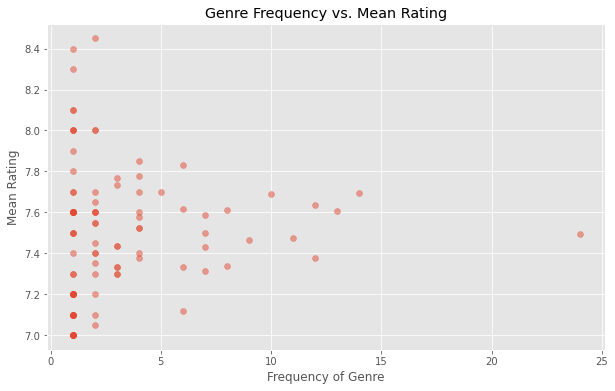

In [28]:
# Creating a bar plot representing the relationship between genres and rating

plt.figure(figsize=(10, 6))
plt.scatter(result_df['Frequency'], result_df['Mean Rating'], alpha=0.5)
plt.xlabel('Frequency of Genre')
plt.ylabel('Mean Rating')
plt.title('Genre Frequency vs. Mean Rating')
plt.grid(True)


plt.show()

The above analysis does not clearly depict these relationships and makes it difficult to actualy determine which genre is popular.

We will now analyse the genres seperately and not in groups.

In [29]:
# Code to split the genres
split_values = df['genres'].str.split(',', expand=True).stack()

# Calculate the frequency of each genre
# Convert the frequency Series to a list of tuples
frequency_of_each_genre = split_values.value_counts()

frequency_of_each_genre

Drama        191
Action       112
Adventure    100
Comedy        84
Thriller      54
Sci-Fi        50
Crime         49
Biography     47
Romance       36
Animation     32
Mystery       30
Fantasy       23
History       18
Horror        17
Family        12
Music          7
Sport          7
War            5
Musical        3
Western        1
dtype: int64

In [30]:

split_values.reset_index(drop=True, inplace=True)


# Create a new DataFrame with 'genre' and 'rating' columns
genre_rating_df = pd.DataFrame({'genre': split_values, 'rating': df['averagerating']})

# Calculate the mean rating for each genre
mean_rating_by_genre2 = genre_rating_df.groupby('genre')['rating'].mean()

# Print or use mean_rating_by_genre as needed
print(mean_rating_by_genre2)

genre
Action       7.458824
Adventure    7.622449
Animation    7.435294
Biography    7.623077
Comedy       7.467857
Crime        7.565217
Drama        7.511538
Family       7.500000
Fantasy      7.466667
History      7.580000
Horror       7.500000
Music        7.250000
Musical           NaN
Mystery      7.442857
Romance      7.511111
Sci-Fi       7.581481
Sport        7.200000
Thriller     7.466667
War               NaN
Western           NaN
Name: rating, dtype: float64


In [31]:
results_df2 = pd.DataFrame({'Genre': mean_rating_by_genre2.index, 'Mean Rating': mean_rating_by_genre2.values, 'Frequency': frequency_of_each_genre[mean_rating_by_genre2.index].values})
results_df2 = results_df2.sort_values(by='Frequency', ascending=False)

results_df2

,Genre,Mean Rating,Frequency
6,Drama,7.511538,191
0,Action,7.458824,112
1,Adventure,7.622449,100
4,Comedy,7.467857,84
17,Thriller,7.466667,54
15,Sci-Fi,7.581481,50
5,Crime,7.565217,49
3,Biography,7.623077,47
14,Romance,7.511111,36
2,Animation,7.435294,32


In [32]:
split_values.reset_index(drop=True, inplace=True)


# Create a new DataFrame with 'genre' and 'numvotes' columns
genre_votes_df = pd.DataFrame({'genre': split_values, 'numvotes': df['numvotes']})

# Calculate the mean rating for each genre
mean_votes_by_genre2 = genre_votes_df.groupby('genre')['numvotes'].mean()

# Print or use mean_rating_by_genre as needed
print(mean_votes_by_genre2)

genre
Action       312954.078431
Adventure    379347.918367
Animation    227154.529412
Biography    308543.461538
Comedy       265898.071429
Crime        227326.391304
Drama        267709.423077
Family       286920.500000
Fantasy      420042.777778
History      293800.400000
Horror       161310.000000
Music        269787.000000
Musical                NaN
Mystery      290420.928571
Romance      201331.555556
Sci-Fi       378470.074074
Sport        171353.000000
Thriller     345687.500000
War                    NaN
Western                NaN
Name: numvotes, dtype: float64


In [33]:
results_df3 = pd.DataFrame({'Genre': mean_votes_by_genre2.index, 'Mean Votes': mean_votes_by_genre2.values, 'Frequency': frequency_of_each_genre[mean_votes_by_genre2.index].values})
results_df3 = results_df3.sort_values(by='Mean Votes', ascending=False)

results_df3

,Genre,Mean Votes,Frequency
8,Fantasy,420042.777778,23
1,Adventure,379347.918367,100
15,Sci-Fi,378470.074074,50
17,Thriller,345687.500000,54
0,Action,312954.078431,112
3,Biography,308543.461538,47
9,History,293800.400000,18
13,Mystery,290420.928571,30
7,Family,286920.500000,12
11,Music,269787.000000,7


In [34]:
# A function to plot the relationship of 2 columns
def scatter_plot(data, x_column, y_column, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(data[x_column], data[y_column], alpha=0.5, picker=True)
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title(title)
    ax.grid(True)

    plt.show()

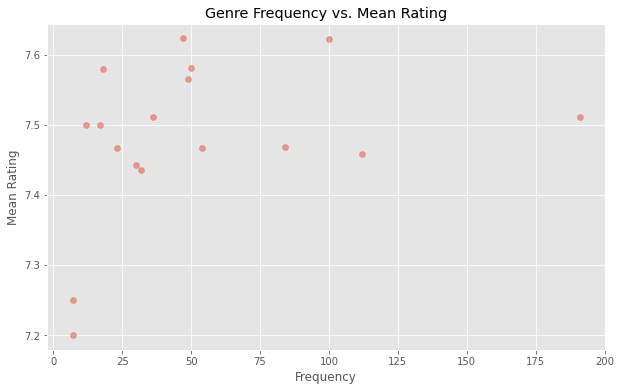

In [35]:
scatter_plot(results_df2, 'Frequency', 'Mean Rating', 'Genre Frequency vs. Mean Rating')

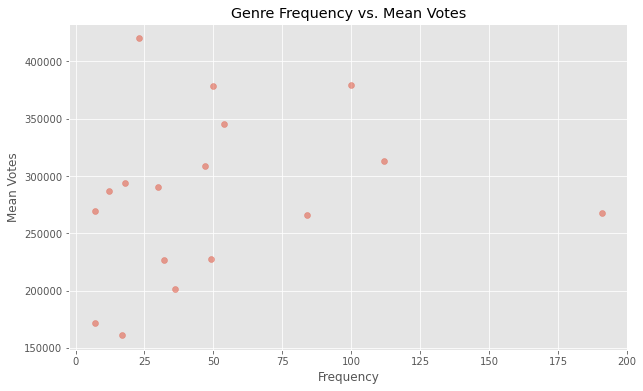

In [36]:
scatter_plot(results_df3, 'Frequency', 'Mean Votes', 'Genre Frequency vs. Mean Votes')

From the above analysis of relating the genres with rating and size of audience, it can be seen that:
- There are genres that appear frequently in the top
- There are genres that are most preferred.

The objectives that have been met so far are that of establishing possible runtime and possible genres.

The next step is to analyse another set of data, `bom.movie_gross.csv`

## Data Analysis - `bom.movie_gross.csv` and `tmdb.movies.csv`

The analysis of the two tables starts with opening the tables.
The next step was to combine relevant columns from this table to our already pre-existing data.

In [37]:
# Revisiting our `movie_basics` table
df0 = pd.read_sql("""
SELECT * FROM movie_basics
""", conn)
df0

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [38]:
# Code to open the `bom.movie_gross.csv`
df2 = pd.read_csv("C:/Users/kimut/Moringa Data Science/Phase 1/Project./Data/bom.movie_gross.csv")
df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We want to check if there are movie names that match in the two tables



In [39]:
#Code to compare the movie names columns for both tables
compared_titles = df2[df2['title'].isin(df0['primary_title'])]
filtered_compared_titles = compared_titles.dropna()
filtered_compared_titles

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
...,...,...,...,...,...
3271,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018


There is data in the two separate tables that match, as we can see in the above table. We are going to add the `movie_id` column to the `bom.movie_gross.csv` table to prepare for comparing it to our combined id.mb tables from the previous section

In [40]:
# Merged table to include movie ids to the filtered compared titles 
filtered_compared_titles = filtered_compared_titles.merge(df0[['primary_title', 'movie_id']], left_on='title', right_on='primary_title', how='inner')

filtered_compared_titles
# Drop the repeated primary title column
new_filtered_compared_titles = filtered_compared_titles.drop(['primary_title'], axis=1)
new_filtered_compared_titles

,title,studio,domestic_gross,foreign_gross,year,movie_id
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761
1,Inception,WB,292600000.0,535700000,2010,tt1375666
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705
...,...,...,...,...,...,...
2014,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,tt3576728
2015,I Still See You,LGF,1400.0,1500000,2018,tt2160105
2016,The Catcher Was a Spy,IFC,725000.0,229000,2018,tt4602066
2017,Time Freak,Grindstone,10000.0,256000,2018,tt6769280


In [41]:
# Code to compare if we have matching rows between combined im.db tables from the previous section and the `bom.movie_gross.csv` table
compared_movie_ids = new_filtered_compared_titles[new_filtered_compared_titles['movie_id'].isin(df['movie_id'])]
compared_movie_ids

,title,studio,domestic_gross,foreign_gross,year,movie_id
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705
5,Tangled,BV,200800000.0,391000000,2010,tt0398286
6,Despicable Me,Uni.,251500000.0,291600000,2010,tt1323594
7,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,tt0892769
...,...,...,...,...,...,...
1896,First Man,Uni.,44900000.0,60800000,2018,tt1213641
1903,The Favourite,FoxS,34400000.0,61600000,2018,tt5083738
1913,BlacKkKlansman,Focus,49300000.0,44000000,2018,tt7349662
1918,Hereditary,A24,44100000.0,35300000,2018,tt7784604


The next step added the `domestic_gross` and `foreign_gross` columns to `df` table that had been combined in the previous section.
The columns will answer the question:
- What is the performance of the genres in terms of gross revenues?

In [42]:
merged_df = df.merge(new_filtered_compared_titles[['title', 'movie_id', 'domestic_gross', 'foreign_gross']], on='movie_id', how='inner')
merged_df

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross
0,tt1392170,142.0,"Action,Adventure,Sci-Fi",7.2,795227,The Hunger Games,408000000.0,286400000
1,tt1392190,120.0,"Action,Adventure,Sci-Fi",8.1,780910,Mad Max: Fury Road,153600000.0,224800000
2,tt2267998,149.0,"Drama,Mystery,Thriller",8.1,761592,Gone Girl,167800000.0,201600000
3,tt0903624,169.0,"Adventure,Family,Fantasy",7.9,719629,The Hobbit: An Unexpected Journey,303000000.0,718100000
4,tt1454468,91.0,"Drama,Sci-Fi,Thriller",7.7,710018,Gravity,274100000.0,449100000
...,...,...,...,...,...,...,...,...
262,tt4209788,140.0,"Biography,Crime,Drama",7.5,104786,Molly's Game,28800000.0,30500000
263,tt5462602,120.0,"Comedy,Drama,Romance",7.6,104008,The Big Sick,42900000.0,13500000
264,tt1327773,132.0,"Biography,Drama",7.2,102468,Lee Daniels' The Butler,116600000.0,60000000
265,tt1023114,133.0,"Adventure,Drama,History",7.3,102126,The Way Back,2700000.0,17600000


Including one more table of interest below that has beneficial data to our objective.

In [43]:
df3 = pd.read_csv("C:/Users/kimut/Moringa Data Science/Phase 1/Project./Data/tmdb.movies.csv")
df3

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [44]:
compared_df = merged_df[merged_df['title'].isin(df3['title'])]
compared_df

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross
0,tt1392170,142.0,"Action,Adventure,Sci-Fi",7.2,795227,The Hunger Games,408000000.0,286400000
1,tt1392190,120.0,"Action,Adventure,Sci-Fi",8.1,780910,Mad Max: Fury Road,153600000.0,224800000
2,tt2267998,149.0,"Drama,Mystery,Thriller",8.1,761592,Gone Girl,167800000.0,201600000
3,tt0903624,169.0,"Adventure,Family,Fantasy",7.9,719629,The Hobbit: An Unexpected Journey,303000000.0,718100000
4,tt1454468,91.0,"Drama,Sci-Fi,Thriller",7.7,710018,Gravity,274100000.0,449100000
...,...,...,...,...,...,...,...,...
261,tt6499752,100.0,"Action,Sci-Fi,Thriller",7.6,104978,Upgrade,12000000.0,2400000
262,tt4209788,140.0,"Biography,Crime,Drama",7.5,104786,Molly's Game,28800000.0,30500000
263,tt5462602,120.0,"Comedy,Drama,Romance",7.6,104008,The Big Sick,42900000.0,13500000
265,tt1023114,133.0,"Adventure,Drama,History",7.3,102126,The Way Back,2700000.0,17600000


After comparing, the column `release_date` was merged to our previously combined table

In [45]:
final_merged_df = compared_df.merge(df3[['title', 'release_date']], on='title', how='inner')
final_merged_df

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,release_date
0,tt1392170,142.0,"Action,Adventure,Sci-Fi",7.2,795227,The Hunger Games,408000000.0,286400000,2012-03-23
1,tt1392190,120.0,"Action,Adventure,Sci-Fi",8.1,780910,Mad Max: Fury Road,153600000.0,224800000,2015-05-15
2,tt2267998,149.0,"Drama,Mystery,Thriller",8.1,761592,Gone Girl,167800000.0,201600000,2014-10-03
3,tt0903624,169.0,"Adventure,Family,Fantasy",7.9,719629,The Hobbit: An Unexpected Journey,303000000.0,718100000,2012-12-14
4,tt1454468,91.0,"Drama,Sci-Fi,Thriller",7.7,710018,Gravity,274100000.0,449100000,2013-10-04
...,...,...,...,...,...,...,...,...,...
338,tt4209788,140.0,"Biography,Crime,Drama",7.5,104786,Molly's Game,28800000.0,30500000,2017-12-25
339,tt5462602,120.0,"Comedy,Drama,Romance",7.6,104008,The Big Sick,42900000.0,13500000,2017-06-23
340,tt1023114,133.0,"Adventure,Drama,History",7.3,102126,The Way Back,2700000.0,17600000,2010-09-03
341,tt2402927,118.0,"Drama,Romance",7.2,100680,Carol,12700000.0,27600000,2015-11-20


In [46]:
df = final_merged_df
df

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,release_date
0,tt1392170,142.0,"Action,Adventure,Sci-Fi",7.2,795227,The Hunger Games,408000000.0,286400000,2012-03-23
1,tt1392190,120.0,"Action,Adventure,Sci-Fi",8.1,780910,Mad Max: Fury Road,153600000.0,224800000,2015-05-15
2,tt2267998,149.0,"Drama,Mystery,Thriller",8.1,761592,Gone Girl,167800000.0,201600000,2014-10-03
3,tt0903624,169.0,"Adventure,Family,Fantasy",7.9,719629,The Hobbit: An Unexpected Journey,303000000.0,718100000,2012-12-14
4,tt1454468,91.0,"Drama,Sci-Fi,Thriller",7.7,710018,Gravity,274100000.0,449100000,2013-10-04
...,...,...,...,...,...,...,...,...,...
338,tt4209788,140.0,"Biography,Crime,Drama",7.5,104786,Molly's Game,28800000.0,30500000,2017-12-25
339,tt5462602,120.0,"Comedy,Drama,Romance",7.6,104008,The Big Sick,42900000.0,13500000,2017-06-23
340,tt1023114,133.0,"Adventure,Drama,History",7.3,102126,The Way Back,2700000.0,17600000,2010-09-03
341,tt2402927,118.0,"Drama,Romance",7.2,100680,Carol,12700000.0,27600000,2015-11-20


In [47]:
df.columns

Index(['movie_id', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'title', 'domestic_gross', 'foreign_gross', 'release_date'],
      dtype='object')

Our new `df` has 9 columns. The additional 3 columns, `foreign_gross`, `domestic_gross` and `release_date` will help us determine:
- The relationship of revenue to popularity
- The relationship between release months and revenue to establish the appropriate release date which is part of our objective

In [48]:
# Code to check if release date has an effect on the audience size and rating
# Convert 'release_date' to a datetime object

df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the month values and create a new 'month' column
df['month'] = df['release_date'].dt.month

# Print or use the DataFrame with the 'month' column as needed
df

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,domestic_gross,foreign_gross,release_date,month
0,tt1392170,142.0,"Action,Adventure,Sci-Fi",7.2,795227,The Hunger Games,408000000.0,286400000,2012-03-23,3
1,tt1392190,120.0,"Action,Adventure,Sci-Fi",8.1,780910,Mad Max: Fury Road,153600000.0,224800000,2015-05-15,5
2,tt2267998,149.0,"Drama,Mystery,Thriller",8.1,761592,Gone Girl,167800000.0,201600000,2014-10-03,10
3,tt0903624,169.0,"Adventure,Family,Fantasy",7.9,719629,The Hobbit: An Unexpected Journey,303000000.0,718100000,2012-12-14,12
4,tt1454468,91.0,"Drama,Sci-Fi,Thriller",7.7,710018,Gravity,274100000.0,449100000,2013-10-04,10
...,...,...,...,...,...,...,...,...,...,...
338,tt4209788,140.0,"Biography,Crime,Drama",7.5,104786,Molly's Game,28800000.0,30500000,2017-12-25,12
339,tt5462602,120.0,"Comedy,Drama,Romance",7.6,104008,The Big Sick,42900000.0,13500000,2017-06-23,6
340,tt1023114,133.0,"Adventure,Drama,History",7.3,102126,The Way Back,2700000.0,17600000,2010-09-03,9
341,tt2402927,118.0,"Drama,Romance",7.2,100680,Carol,12700000.0,27600000,2015-11-20,11


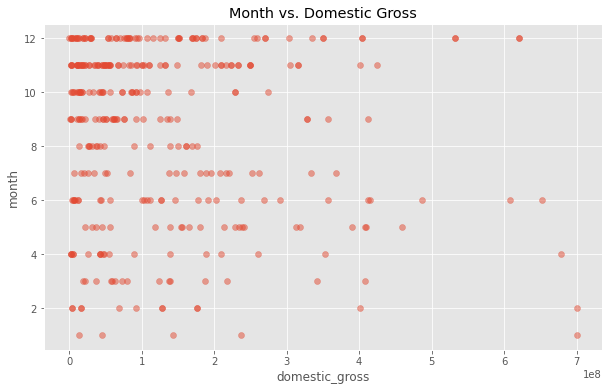

In [49]:
scatter_plot(df, 'domestic_gross', 'month', 'Month vs. Domestic Gross')

In this plot, movies in May are seen to have a generally higher domestic gross

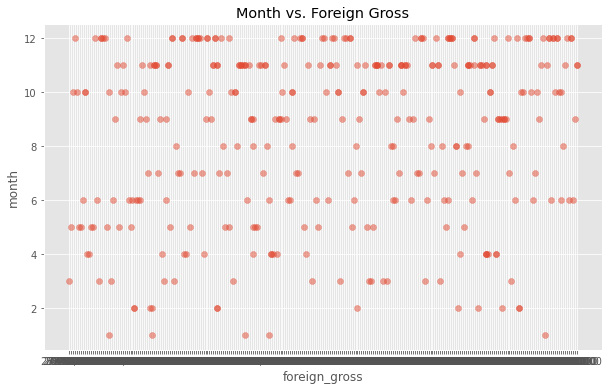

In [50]:
scatter_plot(df, 'foreign_gross', 'month', 'Month vs. Foreign Gross')

This plot showed that foreign_gross was rather uniform throughout the year

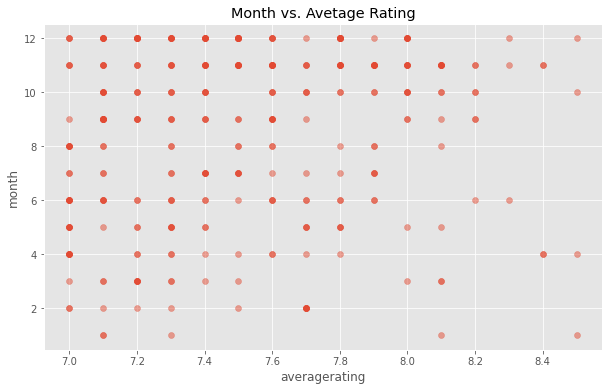

In [52]:
scatter_plot(df, 'averagerating', 'month', 'Month vs. Avetage Rating')

This plot could not establish a clear relationship

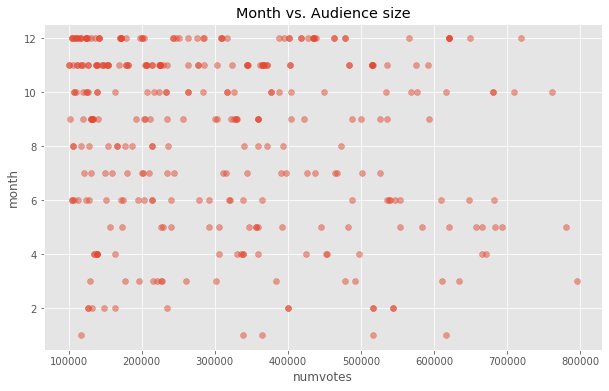

In [53]:
scatter_plot(df, 'numvotes', 'month', 'Month vs. Audience size')

In the above plot, most movies are released in Nov and Dec however, to smaller audiences as compares to May and June

## Conclusions and Recommendations
**Conclusoions**
After performing the analysis on the data, the following are the conclusions

- The suggested movue runtime to be between 80 to 160 minutes
- The suggested genres are Action, Drama, and Adventure
- The suggessted release month is either January and December, during the holidays

The above suggestions showed to return a higher rating, have a large audience, and a higher gross revenue.

**Recommendations**

I would recommend performing analysis with outlier outlier on the higher end to go for exeptionality

Also, points to check to identify competition could be studios that are consistent in producing high rating high gross revenue films